In [13]:
import numpy as np
from matplotlib import pyplot as pl
from pathlib import Path
import re
import typing

In [55]:
class TimeStats(typing.NamedTuple):
    system: float
    user: float
    elapsed: float

def parse_time_output(s: str):
    f = '(([0-9]:)?[0-9]+\.[0-9]+)'
    m = re.match(f'{f}user {f}system {f}elapsed', s)
    
    def parse_time(s: str):
        t = 0
        if ':' in s:
            minutes, s = s.split(':')
            t += float(minutes) * 60
        
        t += float(s)
        return t
            
    if m is None:
        return None
    else:
        return TimeStats(
            user=parse_time(m.group(1)),
            system=parse_time(m.group(3)),
            elapsed=parse_time(m.group(5)),
        )

In [64]:
RUN_DIR = Path('runs.out')
results = {}
for config in ['ghc1', 'ghc2']:
    infos = []
    config_dir = RUN_DIR / config
    for run in config_dir.iterdir():
        time_output = parse_time_output((run / 'time').read_text())
        info = {
            'time': time_output,
            'rate': float((run / 'out').read_text()),
        }
        infos.append(info)
    
    results[config] = infos

In [65]:
results


{'ghc1': [{'time': TimeStats(system=3.37, user=0.08, elapsed=3.46),
   'rate': 2960.5940294298684},
  {'time': TimeStats(system=3.35, user=0.09, elapsed=3.45),
   'rate': 2974.195408655255},
  {'time': TimeStats(system=3.34, user=0.09, elapsed=3.44),
   'rate': 2981.3907450572015},
  {'time': TimeStats(system=3.3, user=0.09, elapsed=3.4),
   'rate': 3014.046413482035},
  {'time': TimeStats(system=3.35, user=0.11, elapsed=3.48),
   'rate': 2950.609297146006},
  {'time': TimeStats(system=3.43, user=0.09, elapsed=3.53),
   'rate': 2906.178990397006},
  {'time': TimeStats(system=3.36, user=0.11, elapsed=3.47),
   'rate': 2951.726635599096},
  {'time': TimeStats(system=3.39, user=0.09, elapsed=3.49),
   'rate': 2938.1230151053037},
  {'time': TimeStats(system=3.41, user=0.09, elapsed=3.51),
   'rate': 2918.9154827218135},
  {'time': TimeStats(system=3.31, user=0.1, elapsed=3.42),
   'rate': 2997.7873653484303}],
 'ghc2': [{'time': TimeStats(system=3.38, user=0.18, elapsed=3.57),
   'rate': 

In [87]:
def compare(get_metric, suptitle, xlabel):
    print(suptitle)
    pl.figure()
    for config, run_results in results.items():
        xs = [get_metric(r) for r in run_results]
        pl.hist(xs, label=config)
        pl.axvline(np.mean(xs))
        print(np.mean(xs))
    
    pl.xlim(0)
    pl.suptitle(suptitle)
    pl.xlabel(xlabel)
    pl.ylabel('occurrences')
    pl.legend()

throughput
2959.3567382942015
2816.1171269007505
elapsed time
3.465
3.6440000000000006
system time
3.3609999999999998
3.441


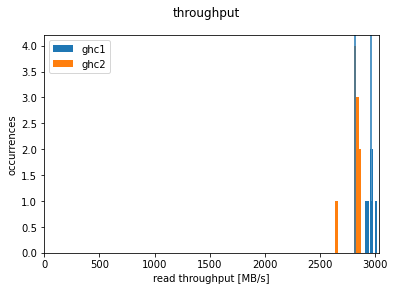

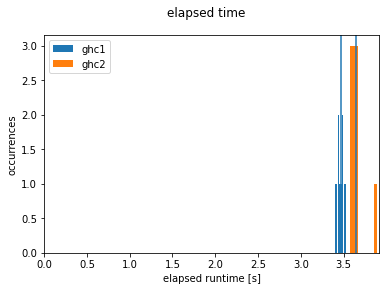

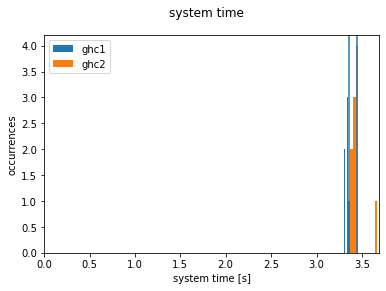

In [88]:
compare(lambda r: r['rate'], suptitle='throughput', xlabel='read throughput [MB/s]')
compare(lambda r: r['time'].elapsed, suptitle='elapsed time', xlabel='elapsed runtime [s]')
compare(lambda r: r['time'].system, suptitle='system time', xlabel='system time [s]')

In [75]:
def rel_delta(a, b):
    return (b - a) / a

In [76]:
rel_delta(3.465, 3.644)

0.05165945165945174

In [78]:
rel_delta(2959, 2816)

-0.048327137546468404